# **Оценка стоимости подержанных автомобилей**

## 0. Описание задачи

Проанализировать зависимость цен на подержанные автомобили от года первой регистрации, пробега и других факторов по данным, указанным в объявлениях. Создать модель, предсказывающую подходящую цену для подержанного автомобиля, исходя из выявленной в данных зависимости. Использовать модель линейной регрессии.

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Чтение данных и предобработка

In [2]:
# Загрузка данных из файла на диске
df = pd.read_csv('data/autos.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

- `dateCrawled`	- Дата и время, когда объявление было впервые просмотрено поисковым роботом. (Date)
- `name` - Название автомобиля. (String)
- `seller`	- Тип продавца (частный или дилер). (String)
- `offerType`	- Тип предложения (например, продажа, ремонт и т.д.). (String)
- `price`	- Цена автомобиля. (Integer)
- `abtest`	- Тип теста abtest (A или B). (String)
- `vehicleType`	- Тип транспортного средства (например, внедорожник, седан и т.д.). (String)
- `yearOfRegistration`	- Год, в котором автомобиль был впервые зарегистрирован. (Integer)
- `gearbox`	- Тип коробки передач (механическая или автоматическая). (String)
- `powerPS`	- Мощность двигателя автомобиля в л.с. (Integer)
- `model`	- Модель автомобиля. (String)
- `kilometer`	- Пробег в км. (Integer)
- `monthOfRegistration`	- Месяц, в котором автомобиль был впервые зарегистрирован. (Integer)
- `fuelType`	- Тип топлива (например, дизельное топливо, бензин и т.д.). (String)
- `brand`	- Марка автомобиля. (String)
- `notRepairedDamage`	- Есть ли неотремонтированные повреждения автомобиля. (String)
- `dateCreated`	- Дата размещения объявления. (Date)
- `nrOfPictures`	- Количество фотографий автомобиля. (Integer)
- `postalCode`	- Почтовый индекс места, где было размещено объявление. (Integer)
- `lastSeen`	- Дата последнего просмотра объявления. (Date)

In [3]:
df.head(5)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Исключим из таблицы столбцы, связанные с датой публикации и просмотра объявлений: dateCrawled, dateCreated, lastSeen. Эти столбцы не характеризуют автомобиль, хотя и важны для решения других задач, связанных анализом продаж подержанных автомобилей.
Уберём столбец abtest, чтобы не усложнять задачу учётом маркетинга. Столбец index также не влияет на нашу задачу.

In [4]:
df = df.drop(['index', 'dateCrawled', 'dateCreated', 'lastSeen', 'abtest'], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 371528 non-null  object
 1   seller               371528 non-null  object
 2   offerType            371528 non-null  object
 3   price                371528 non-null  int64 
 4   vehicleType          333659 non-null  object
 5   yearOfRegistration   371528 non-null  int64 
 6   gearbox              351319 non-null  object
 7   powerPS              371528 non-null  int64 
 8   model                351044 non-null  object
 9   kilometer            371528 non-null  int64 
 10  monthOfRegistration  371528 non-null  int64 
 11  fuelType             338142 non-null  object
 12  brand                371528 non-null  object
 13  notRepairedDamage    299468 non-null  object
 14  nrOfPictures         371528 non-null  int64 
 15  postalCode           371528 non-nu

Категориальные признаки:
- `name` - Название автомобиля. (String)
- `vehicleType`	- Тип транспортного средства (например, внедорожник, седан и т.д.). (String)
- `model`	- Модель автомобиля. (String)
- `fuelType`	- Тип топлива (например, дизельное топливо, бензин и т.д.). (String)
- `brand`	- Марка автомобиля. (String)

Бинарные категориальные признаки:
- `offerType`	- Тип предложения (продажа или покупка). (String)
- `seller`	- Тип продавца (частный или дилер). (String)
- `notRepairedDamage`	- Есть ли неотремонтированные повреждения автомобиля (да или нет). (String)
- `gearbox`	- Тип коробки передач (механическая или автоматическая). (String)


Числовые признаки:
- `price`	- Цена автомобиля. (Integer)
- `yearOfRegistration`	- Год, в котором автомобиль был впервые зарегистрирован. (Integer)
- `powerPS`	- Мощность двигателя автомобиля в л.с. (Integer)
- `kilometer`	- Пробег в км. (Integer)
- `monthOfRegistration`	- Месяц, в котором автомобиль был впервые зарегистрирован. (Integer)
- `nrOfPictures`	- Количество фотографий автомобиля. (Integer)
- `postalCode`	- Почтовый индекс места, где было размещено объявление. (Integer)

Изменим тип для категориальных признаков.

In [5]:
df['name'] = df['name'].astype('category')
df['vehicleType'] = df['vehicleType'].astype('category')
df['model'] = df['model'].astype('category')
df['fuelType'] = df['fuelType'].astype('category')
df['brand'] = df['brand'].astype('category')
df['offerType'] = df['offerType'].astype('category')
df['seller'] = df['seller'].astype('category')
df['notRepairedDamage'] = df['notRepairedDamage'].astype('category')
df['gearbox'] = df['gearbox'].astype('category')

In [6]:
df.describe(include=['category'])

,name,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,371528,371528,371528,333659,351319,351044,338142,371528,299468
unique,233531,2,2,8,2,251,7,40,2
top,Ford_Fiesta,privat,Angebot,limousine,manuell,golf,benzin,volkswagen,nein
freq,657,371525,371516,95894,274214,30070,223857,79640,263182


Найдём уникальные значения в каждом из столбцов данных.

In [7]:
unique_values = df.T.apply(lambda x: x.unique(), axis=1)
print(unique_values)

name                   [Golf_3_1.6, A5_Sportback_2.7_Tdi, Jeep_Grand_...
seller                                              [privat, gewerblich]
offerType                                              [Angebot, Gesuch]
price                  [480, 18300, 9800, 1500, 3600, 650, 2200, 0, 1...
vehicleType            [nan, coupe, suv, kleinwagen, limousine, cabri...
yearOfRegistration     [1993, 2011, 2004, 2001, 2008, 1995, 1980, 201...
gearbox                                        [manuell, automatik, nan]
powerPS                [0, 190, 163, 75, 69, 102, 109, 50, 125, 101, ...
model                  [golf, nan, grand, fabia, 3er, 2_reihe, andere...
kilometer              [150000, 125000, 90000, 40000, 30000, 70000, 5...
monthOfRegistration           [0, 5, 8, 6, 7, 10, 12, 11, 2, 3, 1, 4, 9]
fuelType               [benzin, diesel, nan, lpg, andere, hybrid, cng...
brand                  [volkswagen, audi, jeep, skoda, bmw, peugeot, ...
notRepairedDamage                                  

Столбец nrOfPictures имеет одно уникальное значение 0 и не даёт нам никакой полезной информации, поэтому исключим его.

In [8]:
df = df.drop('nrOfPictures', axis=1)

## 2. Визуализация, обработка данных и характеристики

### Числовые признаки

Далее идёт информация о числовых признаках. Таблица ниже отражает такие характеристики числовых признаков: количество, среднее значение, стандартное отклонение, минимальное и максимальное значения, нижний и верхний квартили и медиану.

In [9]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


Столбцы price, yearOfRegistaration, powerPC и  monthOfRegistration явно имеют нереалистичные максимумы и/или минимумы. Необходимо избавиться от выбросов!

График зависимости цены автомобилей от года первичной регистрации. На графике видны явные выбросы со значениями цены более 2 млрд, а также выбросы по году регистрации (год регистрации точно не может быть менее 1900 и более 2016).

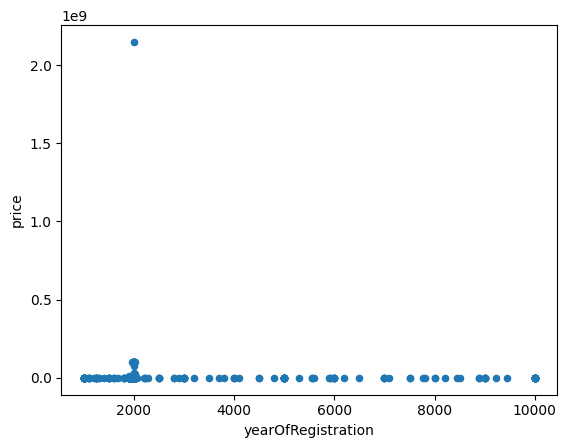

In [10]:
df.plot(kind='scatter', x='yearOfRegistration', y='price')
pass

In [11]:
df['yearOfRegistration']

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

Диаграммы рассеивания

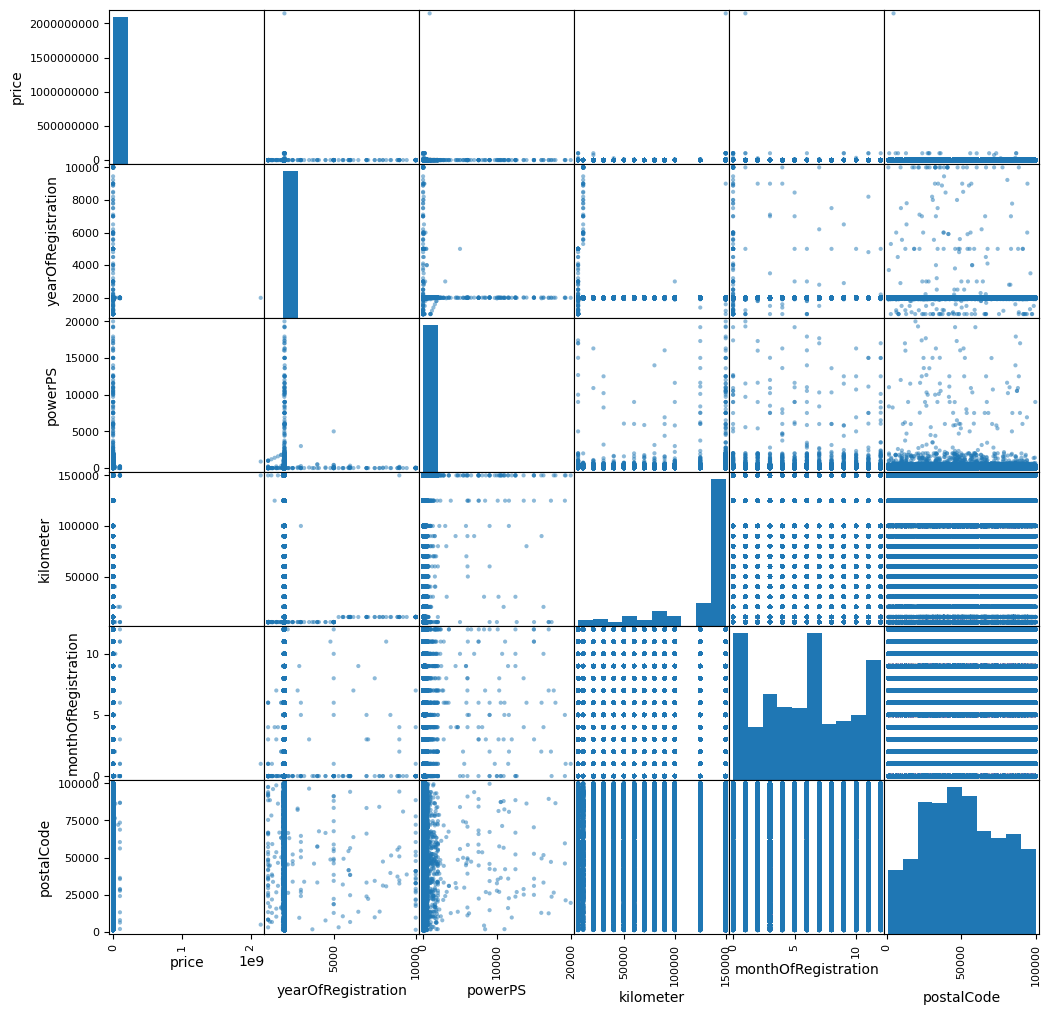

In [12]:
pd.plotting.scatter_matrix(df, figsize = (12, 12))
pass

Распределение числовых признаков:

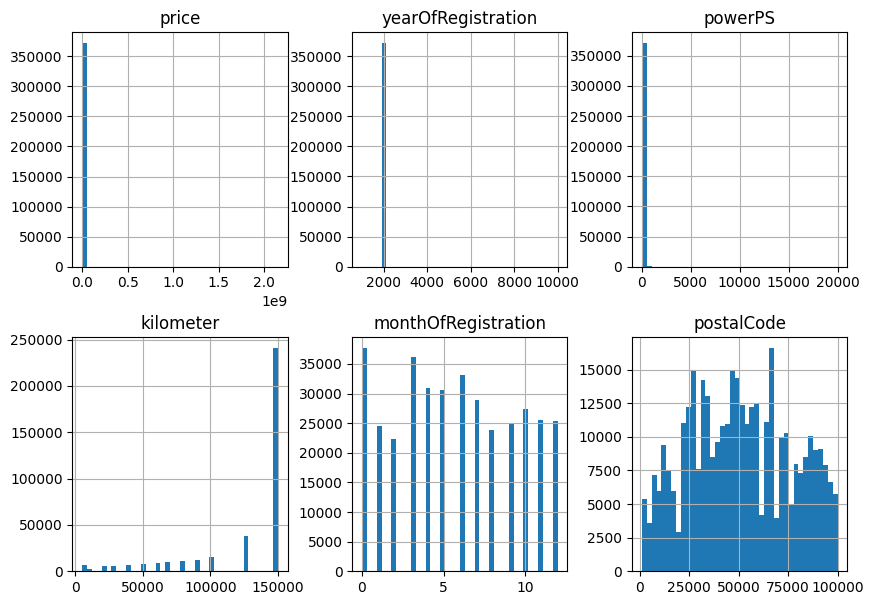

In [13]:
df.hist(bins=40, layout=(2,3), figsize=(10,7));

Для обнаружения выбросов найдем квантили для признаков:

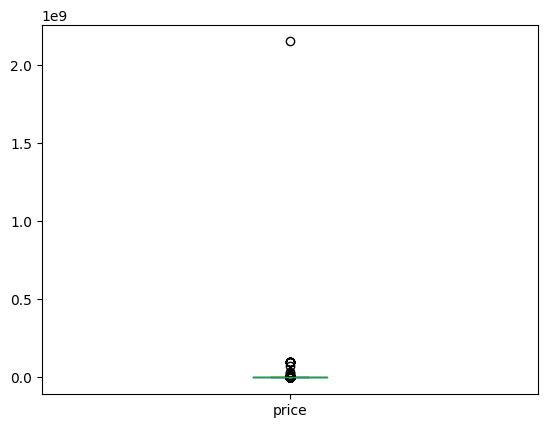

In [15]:
df['price'].plot(kind='box')
pass

In [16]:
df['price'].quantile([0.005,.01,.03,.035,.05,.1,.15,.2,.25,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.030        1.0
0.035       80.0
0.050      200.0
0.100      500.0
0.150      700.0
0.200      900.0
0.250     1150.0
0.500     2950.0
0.900    14000.0
0.950    19790.0
0.990    36000.0
0.995    47500.0
Name: price, dtype: float64

Как можно видеть, значения цен 94,5% автомобилей находятся в пределах от 200 до 47500 евро (это значения квантилей, соответствующих уровням  0.05 и  0.995 соответственно).

In [17]:
df[df['price']<=500.0]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
7,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,19348
15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,24148
16,Polo_6n_1_4,privat,Angebot,300,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,38871
23,Stadtflitzer,privat,Angebot,450,kleinwagen,1997,manuell,50,arosa,150000,5,benzin,seat,nein,9526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,Subaru_Allrad,privat,Angebot,400,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,24558
371486,Zu_verkaufen,privat,Angebot,350,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,25436
371492,Opel_Corsa_B_Swing_grau,privat,Angebot,390,kleinwagen,1997,automatik,0,corsa,100000,6,benzin,opel,ja,17509
371495,Opel_Tigra,privat,Angebot,180,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN,41470


In [18]:
df[(df['price']<=500.0) & (df['notRepairedDamage']!='nein')]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,24148
16,Polo_6n_1_4,privat,Angebot,300,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,38871
24,MERCEDES_200E__TÜV_04/2016,privat,Angebot,500,limousine,1990,manuell,118,andere,150000,10,benzin,mercedes_benz,ja,35390
40,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,NaN,1990,NaN,0,corsa,150000,1,benzin,opel,NaN,56412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,Subaru_Allrad,privat,Angebot,400,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,24558
371486,Zu_verkaufen,privat,Angebot,350,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,25436
371492,Opel_Corsa_B_Swing_grau,privat,Angebot,390,kleinwagen,1997,automatik,0,corsa,100000,6,benzin,opel,ja,17509
371495,Opel_Tigra,privat,Angebot,180,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN,41470


In [19]:
df[df['notRepairedDamage']!='nein'].shape

(108346, 15)

Большая часть автомобилей с ценой менее 500 евро имеют неотремонтированные повреждения. Это доля равняется 29655/41732≈0.71, то есть около 71%.

In [20]:
df[df['price']>700.0]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437
6,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,67112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,39576
371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,26135
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,87439
371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,40764


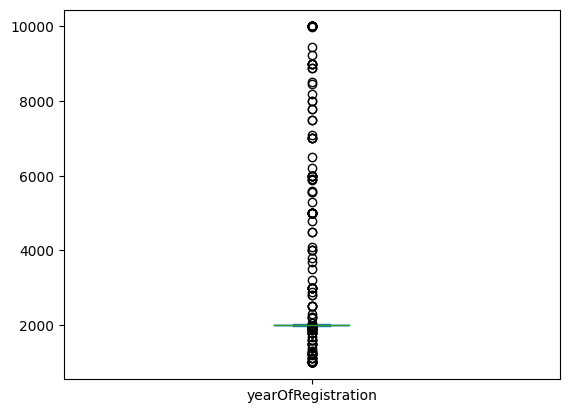

In [21]:
df['yearOfRegistration'].plot(kind='box')
pass

In [22]:
df['yearOfRegistration'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005    1970.0
0.010    1978.0
0.050    1992.0
0.100    1995.0
0.200    1998.0
0.250    1999.0
0.500    2003.0
0.900    2013.0
0.950    2016.0
0.990    2018.0
0.995    2018.0
Name: yearOfRegistration, dtype: float64

Год регистрации 94,5% автомобилей находится в пределах от 1970 до 2016 года (это значения квантилей, соответствующих уровням  0.005 и  0.95 соответственно). Известно, что год размещения объявлений не может быть больше 2016, поэтому год регистрации автомобиля не может его превышать.

Удалим строки таблицы, в которых `yearOfRegistration` выходит за пределы квантилей  0.005 и 0.95 и в которых `price` выходит за пределы квантилей 0.05 и 0,995.

In [23]:
data = df[(df['price']>=200.0) & (df['price']<=47500.0) & (df['yearOfRegistration']>=1970) & (df['yearOfRegistration']<=2016)]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337101 entries, 0 to 371527
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 337101 non-null  category
 1   seller               337101 non-null  category
 2   offerType            337101 non-null  category
 3   price                337101 non-null  int64   
 4   vehicleType          319272 non-null  category
 5   yearOfRegistration   337101 non-null  int64   
 6   gearbox              323247 non-null  category
 7   powerPS              337101 non-null  int64   
 8   model                322290 non-null  category
 9   kilometer            337101 non-null  int64   
 10  monthOfRegistration  337101 non-null  int64   
 11  fuelType             315021 non-null  category
 12  brand                337101 non-null  category
 13  notRepairedDamage    280168 non-null  category
 14  postalCode           337101 non-null  int64   
dtype

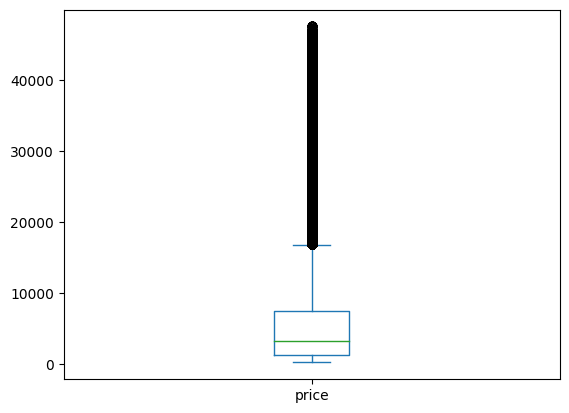

In [25]:
data['price'].plot(kind='box')
pass

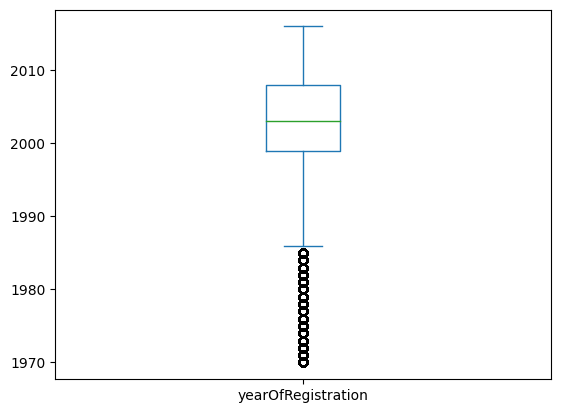

In [26]:
data['yearOfRegistration'].plot(kind='box')
pass

In [27]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,337101.000000,337101.000000,337101.000000,337101.000000,337101.000000,337101.000000
mean,5704.427937,2003.143892,117.840991,126074.277442,5.885690,51124.077285
std,6624.327663,6.542494,183.472674,39113.686659,3.648747,25742.679242
min,200.000000,1970.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1300.000000,1999.000000,75.000000,125000.000000,3.000000,30880.000000
50%,3200.000000,2003.000000,109.000000,150000.000000,6.000000,50126.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,71720.000000
max,47500.000000,2016.000000,20000.000000,150000.000000,12.000000,99998.000000


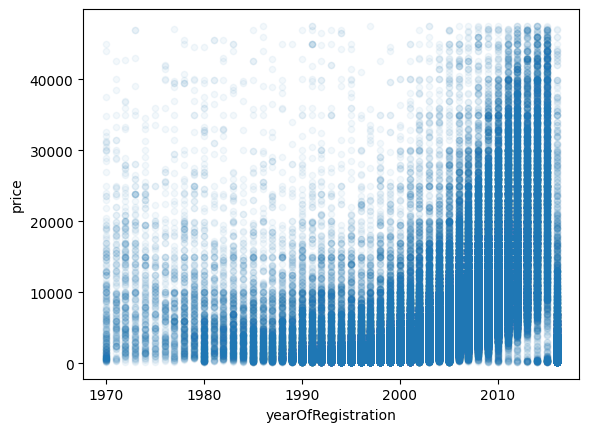

In [28]:
data.plot(kind='scatter', x='yearOfRegistration', y='price', alpha=0.05)
pass

Заметим, что в столбце monthOfRegistration есть строки со значением месяца 0. Удалим их.

In [ ]:
data[data['monthOfRegistration']==0]

In [30]:
data = data[(data['monthOfRegistration']<=12) & (data['monthOfRegistration']>=1)]

In [31]:
data['monthOfRegistration'].value_counts()

3     33713
6     30712
4     28671
5     28428
7     26701
10    25623
11    23926
12    23603
9     23508
1     22560
8     22074
2     20777
Name: monthOfRegistration, dtype: int64

Теперь разберемся с мощностью двигателя (powerPS) и пробегом (kilometer).

In [32]:
data['powerPS'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005      0.0
0.010      0.0
0.050      0.0
0.100     54.0
0.200     69.0
0.250     75.0
0.500    110.0
0.900    197.0
0.950    232.0
0.990    333.0
0.995    387.0
Name: powerPS, dtype: float64

Удалим строки в столбце powerPS, значения которых выходят за квантиль 0.05 и 0.995.

In [33]:
data = data[(data['powerPS']>=54) & (data['powerPS']<=387)]

In [34]:
data[(data['powerPS']>=203)]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
21,BMW_530i_TÜV_7/17_Scheckheftgepflegt_sehr_gute...,privat,Angebot,3699,limousine,2002,automatik,231,5er,150000,7,benzin,bmw,nein,68309
33,BMW_325i_Aut.,privat,Angebot,18000,limousine,2007,automatik,218,3er,20000,5,benzin,bmw,nein,39179
41,E_500_Avantgarde_AMG_Ausstattung,privat,Angebot,7500,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,33649
42,BMW_E60_530XD,privat,Angebot,12500,limousine,2006,automatik,231,5er,150000,11,diesel,bmw,NaN,46119
56,BMW_435i_Sport_coupe,privat,Angebot,39600,coupe,2014,automatik,306,andere,30000,7,benzin,bmw,nein,10435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371481,PORSCHE_944_S2_CABRIO_1991_3_0_211PS_ANTHAZIT/...,privat,Angebot,12800,cabrio,1991,manuell,211,andere,150000,7,benzin,porsche,nein,21147
371484,Opel_vectra_c_mit_diblas_komplett_umbau,privat,Angebot,2999,kombi,2004,manuell,234,vectra,100000,1,NaN,opel,NaN,83364
371512,Mercedes_Benz_E_400_CDI_Avantgarde,privat,Angebot,5000,limousine,2003,automatik,260,e_klasse,150000,12,diesel,mercedes_benz,ja,90473
371520,turbo_defekt,privat,Angebot,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,96465


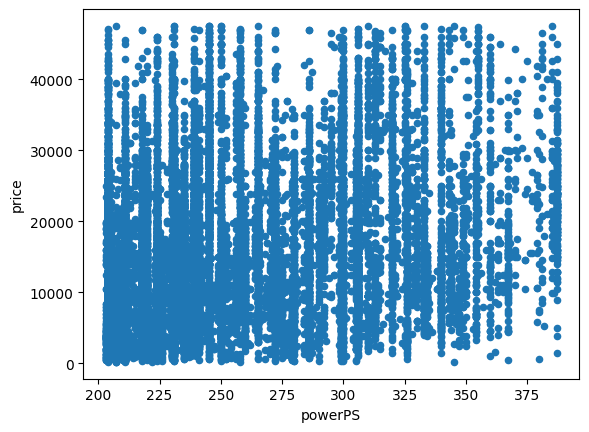

In [35]:
high_powerPS = data[(data['powerPS']>=203)]
#print(high_powerPS['powerPS'])
high_powerPS.plot(kind='scatter', x='powerPS', y='price')
pass

In [36]:
data['kilometer'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005      5000.0
0.010     10000.0
0.050     40000.0
0.100     60000.0
0.200     90000.0
0.250    100000.0
0.500    150000.0
0.900    150000.0
0.950    150000.0
0.990    150000.0
0.995    150000.0
Name: kilometer, dtype: float64

Пробег корректировать не будем, так как минимальные и максимальные значения попадают в дипозон квантилей
0.005 и 0.995.

In [37]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,279909.000000,279909.000000,279909.000000,279909.000000,279909.000000,279909.000000
mean,6242.336727,2003.650526,127.970330,125242.239442,6.383657,51847.373429
std,6754.666752,6.182377,55.362389,39054.919040,3.346183,25751.133893
min,200.000000,1970.000000,54.000000,5000.000000,1.000000,1067.000000
25%,1600.000000,2000.000000,87.000000,100000.000000,4.000000,31319.000000
50%,3800.000000,2004.000000,116.000000,150000.000000,6.000000,51067.000000
75%,8450.000000,2008.000000,150.000000,150000.000000,9.000000,72631.000000
max,47500.000000,2016.000000,387.000000,150000.000000,12.000000,99998.000000


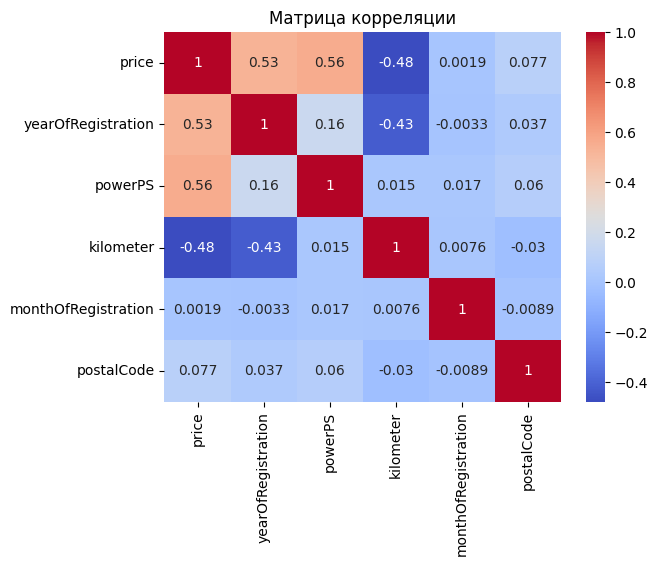

In [38]:
correlation_matrix = data.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Матрица корреляции позволяет определить зависимость (корреляцию) между величинами (признаками). "Теплые" оттенки говорят о том, что с увеличением одной величины, другая также возрастает (положительная корреляция). "Холодные" оттенки говорят о том, что с увеличением одной величины, другая уменьшается(отрицательная корреляция). Таким образом, видно, что стоимость автомобилей сильно коррелирует со значением года первичной регистрации, так как более новые автомобили очевидно стоят дороже, а также с мощностью двигателя. Стоимость автомобилей уменьшается с увеличением значения их пробега, это тоже очевидно.

Слабо коррелируют с ценой месяц первичной регистрации и почтовый индекс. Действительно, месяц регистрации в отрыве от года не даёт никакой информации. А почтовый индекс, видимо, тоже не так важен, хотя он мог бы свидетельствовать о месте продажи и как-то влиять на цену.

### Категорильные признаки

Выведем гистограмму, отражающую количество автомобилей по типу кузова.

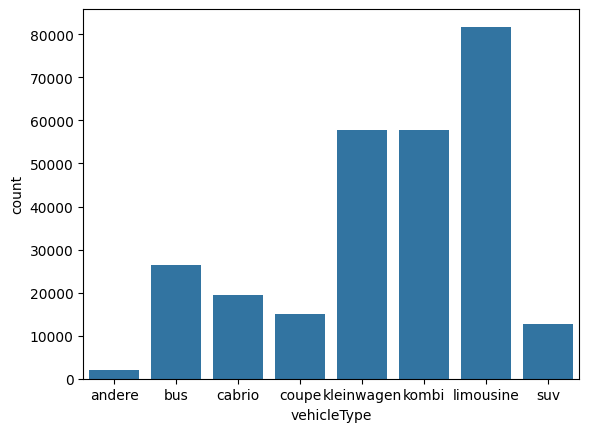

In [39]:
sns.countplot(x='vehicleType', data=data)
pass

Гистограмма кол-ва автомобилей по типу топлива:

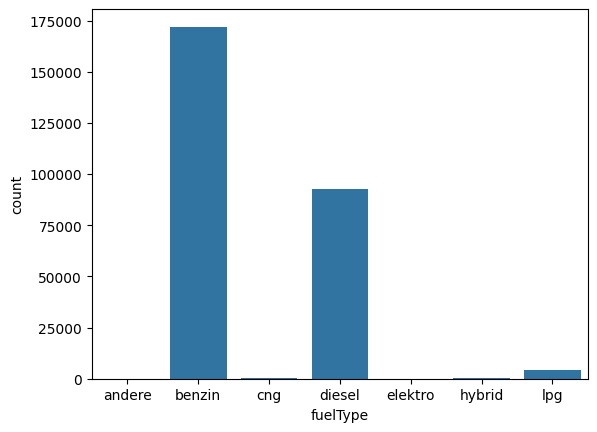

In [40]:
sns.countplot(x='fuelType', data=data)
pass

LPG - сжиженный природный газ.
CNG - водород или природный газ.
Andere - другое топливо.

Автомобили по брендам:

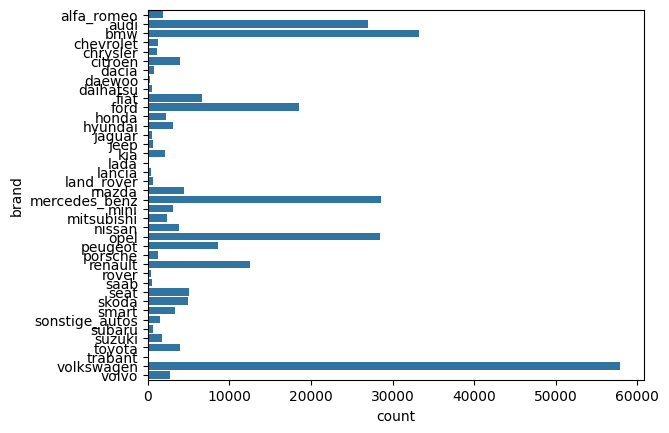

In [41]:
sns.countplot(y='brand', data=data)
pass

Коробка передач в автомобилях с разными типами кузова:

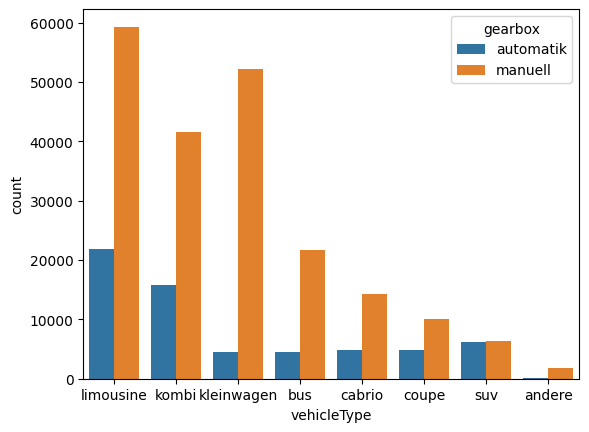

In [42]:
sns.countplot(x='vehicleType', order=data['vehicleType'].value_counts().index, hue='gearbox', data=data)
pass

Тип предложения:

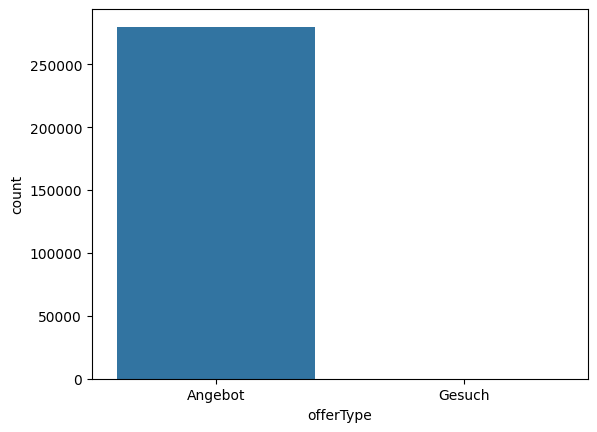

In [43]:
sns.countplot(x='offerType', data=data)
pass

In [44]:
data['offerType'].value_counts()

Angebot    279907
Gesuch          2
Name: offerType, dtype: int64

Так как подавляющее большинство объявлений - это продажа автомобиля, а не покупка, то уберём столбец offerType, чтобы избежать избыточности данных.

In [45]:
data = data.drop('offerType', axis=1)

Неторемонтированные повреждения автомобиля:

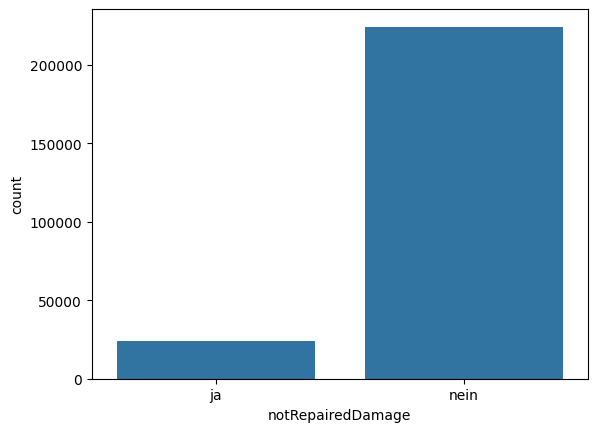

In [46]:
sns.countplot(x='notRepairedDamage', data=data)
pass

Продавцы автомобилей:

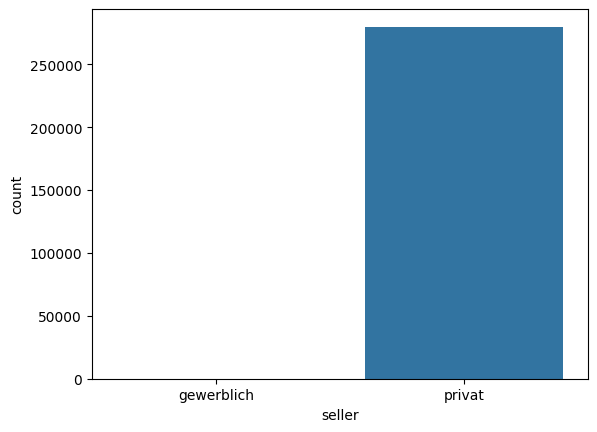

In [47]:
sns.countplot(x='seller', data=data)
pass

In [48]:
data['seller'].value_counts()

privat        279909
gewerblich         0
Name: seller, dtype: int64

Так как продаж автомобилей диллерами нет совсем, исключим столбец seller для того, чтобы избежать избыточности данных.

In [49]:
data = data.drop('seller', axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279909 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 279909 non-null  category
 1   price                279909 non-null  int64   
 2   vehicleType          273012 non-null  category
 3   yearOfRegistration   279909 non-null  int64   
 4   gearbox              276575 non-null  category
 5   powerPS              279909 non-null  int64   
 6   model                271620 non-null  category
 7   kilometer            279909 non-null  int64   
 8   monthOfRegistration  279909 non-null  int64   
 9   fuelType             269723 non-null  category
 10  brand                279909 non-null  category
 11  notRepairedDamage    248022 non-null  category
 12  postalCode           279909 non-null  int64   
dtypes: category(7), int64(6)
memory usage: 27.7 MB


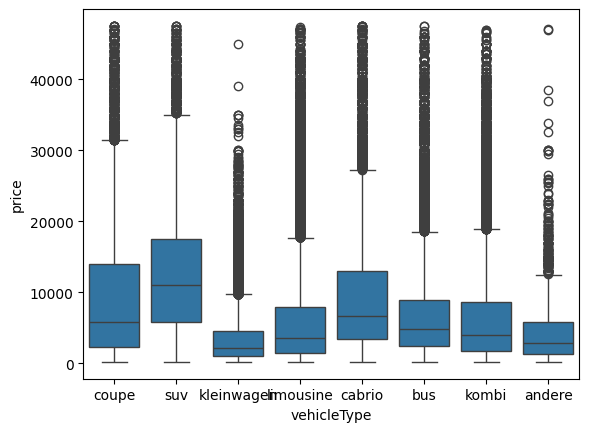

In [58]:
sns.boxplot(x="vehicleType", y="price", data=data)
pass

По значениям медиан понятно, что тип кузова заметно коррелирует с ценой.

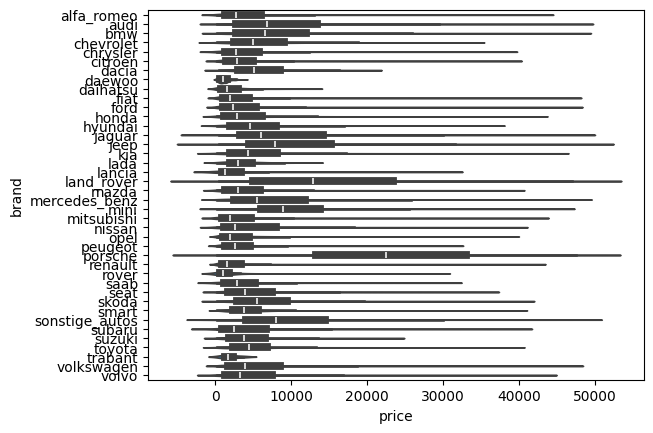

In [61]:
sns.violinplot(y="brand", x="price", data=data)
pass

Очевидно, что модель и марка автомобиля очень сильно влияют на цену. 

## 3. Обработка пропущенных значений

In [51]:
data.isna().sum()

name                       0
price                      0
vehicleType             6897
yearOfRegistration         0
gearbox                 3334
powerPS                    0
model                   8289
kilometer                  0
monthOfRegistration        0
fuelType               10186
brand                      0
notRepairedDamage      31887
postalCode                 0
dtype: int64

В таблице есть строки с пропущенными значениями в столбцах с категориальными признаками. Так как пропущенных значений достаточно много, выберем стратегию заполнения пустых значений модой.

In [52]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mis_val_columns = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']
imp_cat.fit(data[mis_val_columns])

SimpleImputer(strategy='most_frequent')

In [53]:
data[mis_val_columns] = imp_cat.transform(data[mis_val_columns])

In [54]:
data.isna().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

In [77]:

data['vehicleType'] = data['vehicleType'].astype('category')
data['model'] = data['model'].astype('category')
data['fuelType'] = data['fuelType'].astype('category')
data['notRepairedDamage'] = data['notRepairedDamage'].astype('category')
data['gearbox'] = data['gearbox'].astype('category')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279909 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 279909 non-null  category
 1   price                279909 non-null  int64   
 2   vehicleType          279909 non-null  category
 3   yearOfRegistration   279909 non-null  int64   
 4   gearbox              279909 non-null  category
 5   powerPS              279909 non-null  int64   
 6   model                279909 non-null  category
 7   kilometer            279909 non-null  int64   
 8   monthOfRegistration  279909 non-null  int64   
 9   fuelType             279909 non-null  category
 10  brand                279909 non-null  category
 11  notRepairedDamage    279909 non-null  category
 12  postalCode           279909 non-null  int64   
dtypes: category(7), int64(6)
memory usage: 27.7 MB


## 4. Кодирование категориальных признаков (начало)

In [78]:
data.describe(include=['category'])

,name,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,279909,279909,279909,279909,279909,279909,279909
unique,166829,8,2,248,7,40,2
top,BMW_318i,limousine,manuell,golf,benzin,volkswagen,nein
freq,621,88663,216163,31704,182199,57903,256001


Большинство алгоритмов не умеют работать напрямую с категориальными признаками, поэтому необходимо предварительно их закодировать с помощью числовых принаков.

Бинарные признаки заменим на числовые со значениями 0 или 1.

In [81]:
data['gearbox'] = data['gearbox'].map({'manuell': 0, 'automatik': 1})
data['notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})

In [95]:
data['notRepairedDamage'] = data['notRepairedDamage'].astype('int64')
data['gearbox'] = data['gearbox'].astype('int64')

Для небинарных категориальных признаков с небольшим количеством уникальных значений применим метод бинаризации (one-hot encoding). Вместо каждого такого признака будем использовать несколько новых бинарных признаков (dummy-признаков, dummy - фиктивный), отвечающих за каждую вариацию исходного признака.

In [83]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['vehicleType', 'fuelType']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [85]:
dummies = pd.DataFrame(enc.transform(data[['vehicleType', 'fuelType']]),
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Добавим новые столбцы и убёрем старые.

In [87]:
data = pd.concat((data, dummies), axis=1).drop(['vehicleType', 'fuelType'], axis=1)

In [88]:
data.head(5)

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
1,A5_Sportback_2.7_Tdi,18300,2011,0,190,golf,125000,5,audi,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,2004,1,163,grand,125000,8,jeep,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,2001,0,75,golf,150000,6,volkswagen,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,0,69,fabia,90000,7,skoda,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1995,0,102,3er,150000,10,bmw,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Признаки model и brand закодируем отдельно после разбиения данных на обучающую и тестовую выборки.

## 5. Разбиение данных на обучающую и тестовую выборки

Для предсказания цены автомобиля будем использовать все оставшиеся признаки, кроме признака name, отражающего точную модель автомобиля с комплектацией.

In [107]:
X = data.drop(['name', 'price'], axis=1)
y = data['price']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(209931, 69978)

## 6. Кодирование категориальных признаков (окончание)

Для кодирования признаков model и brand используем кодировщик leave-one-out, поскольку он создает один столбец для каждой категориальной переменной вместо создания столбца для каждой вариации категориальной переменной, как при one-hot кодировании. Это упрощает интерпретацию влияния категориальных переменных на влияние функций. После этого модели можно обучать с помощью любого алгоритма.

Leave-One-Out (LOO) кодирование - это метод кодирования категориальных признаков в машинном обучении, при котором каждая категория заменяется на среднее значение целевой переменной по всем объектам с той же самой категорией, за исключением текущего объекта. Другими словами, для каждой категории мы вычисляем среднее значение целевой переменной, и затем заменяем каждую категорию в данных средним значением, рассчитанным без учета текущего объекта.

Преимущества LOO кодирования:
- Устойчивость к переобучению: LOO устраняет возможность утечки информации о целевой переменной для текущего объекта, что может помочь в предотвращении переобучения модели.
- Сохранение информации: LOO учитывает информацию о целевой переменной для всех объектов, за исключением текущего, что может быть полезным при наличии небольшого количества данных.

Недостатки LOO кодирования:
- Высокая вычислительная сложность.
- Возможность утечки информации: в некоторых случаях LOO может все еще допускать утечку информации о целевой переменной, особенно если данных очень мало.


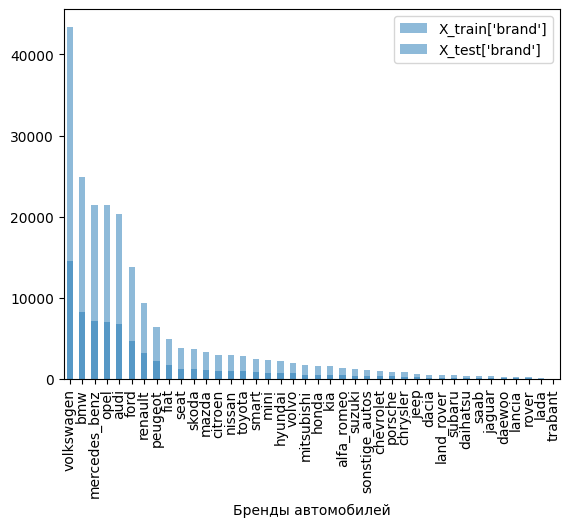

In [129]:
# Столбчатая диаграмма для категориальных данных
X_train['brand'].value_counts().plot(kind='bar', label="X_train['brand']", alpha=0.5)
X_test['brand'].value_counts().plot(kind='bar', label="X_test['brand']", alpha=0.5)
plt.legend()
plt.xlabel('Бренды автомобилей')
plt.show()

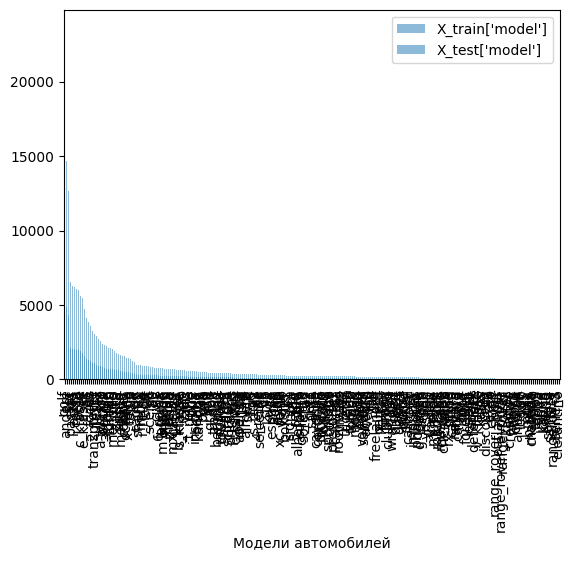

In [128]:
X_train['model'].value_counts().plot(kind='bar', label="X_train['model']", alpha=0.5)
X_test['model'].value_counts().plot(kind='bar', label="X_test['model']", alpha=0.5)
plt.legend()
plt.xlabel('Модели автомобилей')
plt.show()

По диаграммам выше видно, что есть статистическая схожесть выборок. Поэтому после выполнения transform() на тестовой выборке сохранится исходная зависимость между признаком и целевой меткой во время кодирования.

In [130]:
import category_encoders as ce

loo_encoder = ce.LeaveOneOutEncoder(return_df=True, cols=['model', 'brand'])
loo_encoder.fit(X_train, y_train)
X_train_loo = loo_encoder.transform(X_train, y_train)
X_test_loo = loo_encoder.transform(X_test)

In [131]:
print(X_train_loo.dtypes)

yearOfRegistration          int64
gearbox                     int64
powerPS                     int64
model                     float64
kilometer                   int64
monthOfRegistration         int64
brand                     float64
notRepairedDamage           int64
postalCode                  int64
vehicleType_andere        float64
vehicleType_bus           float64
vehicleType_cabrio        float64
vehicleType_coupe         float64
vehicleType_kleinwagen    float64
vehicleType_kombi         float64
vehicleType_limousine     float64
vehicleType_suv           float64
fuelType_andere           float64
fuelType_benzin           float64
fuelType_cng              float64
fuelType_diesel           float64
fuelType_elektro          float64
fuelType_hybrid           float64
fuelType_lpg              float64
dtype: object


In [132]:
X_train_loo.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
46576,2008,0,95,4459.395294,150000,11,8323.675910,0,68549,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124673,1997,0,102,6474.038383,150000,5,8599.691737,0,85276,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
220679,2010,0,190,8820.073253,125000,11,9256.585326,0,34549,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
170125,2008,1,211,5308.509280,90000,12,10314.649247,0,50259,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
314984,2005,0,105,10551.760494,150000,8,6134.768405,0,15370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [133]:
X_test_loo.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
110604,1998,0,145,4269.848837,150000,4,4125.254216,0,75365,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
242202,2009,0,155,1883.065668,150000,11,3275.813505,0,73525,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81270,1997,0,116,6473.567578,150000,10,8599.367192,1,68219,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96476,2001,0,90,4459.959624,150000,2,8323.562914,0,82008,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362725,1997,0,75,10551.590250,150000,11,6134.857492,0,66386,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [146]:
X_train = X_train_loo
X_test = X_test_loo

## 7. Нормализация данных

Выполним приведение значений столбцов к отрезку *$[0;1]$* с помощью MinMax нормализации.

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
scaler.get_feature_names_out(input_features=X_train.columns)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
X_train.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
46576,0.826087,0.0,0.123123,0.126528,1.000000,0.909091,0.325524,0.0,0.682112,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124673,0.586957,0.0,0.144144,0.187085,1.000000,0.363636,0.337975,0.0,0.851189,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
220679,0.869565,0.0,0.408408,0.257603,0.827586,0.909091,0.367608,0.0,0.338438,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
170125,0.826087,1.0,0.471471,0.152051,0.586207,1.000000,0.415337,0.0,0.497235,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
314984,0.760870,0.0,0.153153,0.309655,1.000000,0.636364,0.226783,0.0,0.144576,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [149]:
X_test.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
110604,0.608696,0.0,0.273273,0.120830,1.0,0.272727,0.136134,0.0,0.751008,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
242202,0.847826,0.0,0.303303,0.049087,1.0,0.909091,0.097816,0.0,0.732409,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81270,0.586957,0.0,0.186186,0.187071,1.0,0.818182,0.337961,1.0,0.678776,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96476,0.673913,0.0,0.108108,0.126545,1.0,0.090909,0.325519,0.0,0.818156,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362725,0.586957,0.0,0.063063,0.309650,1.0,0.909091,0.226787,0.0,0.660248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209931 entries, 46576 to 162011
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   yearOfRegistration      209931 non-null  float64
 1   gearbox                 209931 non-null  float64
 2   powerPS                 209931 non-null  float64
 3   model                   209931 non-null  float64
 4   kilometer               209931 non-null  float64
 5   monthOfRegistration     209931 non-null  float64
 6   brand                   209931 non-null  float64
 7   notRepairedDamage       209931 non-null  float64
 8   postalCode              209931 non-null  float64
 9   vehicleType_andere      209931 non-null  float64
 10  vehicleType_bus         209931 non-null  float64
 11  vehicleType_cabrio      209931 non-null  float64
 12  vehicleType_coupe       209931 non-null  float64
 13  vehicleType_kleinwagen  209931 non-null  float64
 14  vehicleType_komb

## 8. Обучение моделей

### Линейная регрессия

In [151]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_train_predict = model.predict(X_train)

In [153]:
y_train

46576      5899
124673      500
220679    14500
170125    19950
314984    10000
          ...  
159234     1200
343916     1800
175216     3300
195031     5499
162011     9150
Name: price, Length: 209931, dtype: int64

In [154]:
y_train_predict

array([ 3252.,  1548., 12596., ...,  3652., 10516., 13528.])

In [157]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(13693930.42320572, 3700.5311001538307)

In [158]:
y_test_predict  = model.predict(X_test)

In [159]:
RSS = ((y_test_predict - y_test)**2).sum()
RSS/N_test, (RSS/N_test)**.5

(13855865.37621824, 3722.3467565795427)